In [1]:
library(IRdisplay)
display_html("<style>.container { width:100% !important; }</style>")

.libPaths()

[1] "/hps/software/users/marioni/Leah/miniconda3/envs/basic_renv/lib/R/library"

In [2]:
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggalluvial))
suppressPackageStartupMessages(library(viridis))
suppressPackageStartupMessages(library(Matrix))
suppressPackageStartupMessages(library(Matrix.utils))
source("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/gastruloids_scRNAseq/plotting_settings.R")

In [3]:
wk_transmat <- readMM("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/gastruloids_scRNAseq/mapping_eval/CellRank/wk_transmat_neuro.mtx")
wk_transmap_3_35 <- read.csv("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/gastruloids_scRNAseq/mapping_eval/CellRank/wk_transmap_3_35_neuro.csv", header = FALSE, ) %>% as.matrix
wk_transmap_35_4 <- read.csv("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/gastruloids_scRNAseq/mapping_eval/CellRank/wk_transmap_35_4_neuro.csv", header = FALSE, ) %>% as.matrix
wk_transmap_4_45 <- read.csv("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/gastruloids_scRNAseq/mapping_eval/CellRank/wk_transmap_4_45_neuro.csv", header = FALSE, ) %>% as.matrix
wk_transmap_45_5 <- read.csv("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/gastruloids_scRNAseq/mapping_eval/CellRank/wk_transmap_45_5_neuro.csv", header = FALSE, ) %>% as.matrix
vk_transmat <- readMM("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/gastruloids_scRNAseq/mapping_eval/CellRank/vk_transmat_neuro.mtx")
ck_transmat <- readMM("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/gastruloids_scRNAseq/mapping_eval/CellRank/ck_transmat_neuro.mtx")

wk_transmat_obs <- fread("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/gastruloids_scRNAseq/mapping_eval/CellRank/wk_obs_neuro.csv")
wk_transmap_3_35_obs <- fread("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/gastruloids_scRNAseq/mapping_eval/CellRank/wk_transmap_3_35_obs_neuro.csv")
wk_transmap_35_4_obs <- fread("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/gastruloids_scRNAseq/mapping_eval/CellRank/wk_transmap_35_4_obs_neuro.csv")
wk_transmap_4_45_obs <- fread("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/gastruloids_scRNAseq/mapping_eval/CellRank/wk_transmap_4_45_obs_neuro.csv")
wk_transmap_45_5_obs <- fread("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/gastruloids_scRNAseq/mapping_eval/CellRank/wk_transmap_45_5_obs_neuro.csv")
vk_transmat_obs <- fread("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/gastruloids_scRNAseq/mapping_eval/CellRank/vk_obs_neuro.csv")
ck_transmat_obs <- fread("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/gastruloids_scRNAseq/mapping_eval/CellRank/ck_obs_neuro.csv")

wk_transmap_3_35_var <- fread("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/gastruloids_scRNAseq/mapping_eval/CellRank/wk_transmap_3_35_var_neuro.csv", header = FALSE)
wk_transmap_35_4_var <- fread("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/gastruloids_scRNAseq/mapping_eval/CellRank/wk_transmap_35_4_var_neuro.csv", header = FALSE)
wk_transmap_4_45_var <- fread("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/gastruloids_scRNAseq/mapping_eval/CellRank/wk_transmap_4_45_var_neuro.csv", header = FALSE)
wk_transmap_45_5_var <- fread("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/gastruloids_scRNAseq/mapping_eval/CellRank/wk_transmap_45_5_var_neuro.csv", header = FALSE)

In [4]:
wk_transmat_obs[cluster == "Anterior PSM 1", cluster := "Early Anterior PSM"]
wk_transmat_obs[cluster == "Anterior PSM 2", cluster := "Late Anterior PSM"]
wk_transmat_obs[cluster == "Posterior PSM 1", cluster := "Early Posterior PSM"]
wk_transmat_obs[cluster == "Posterior PSM 2", cluster := "Late Posterior PSM"]

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


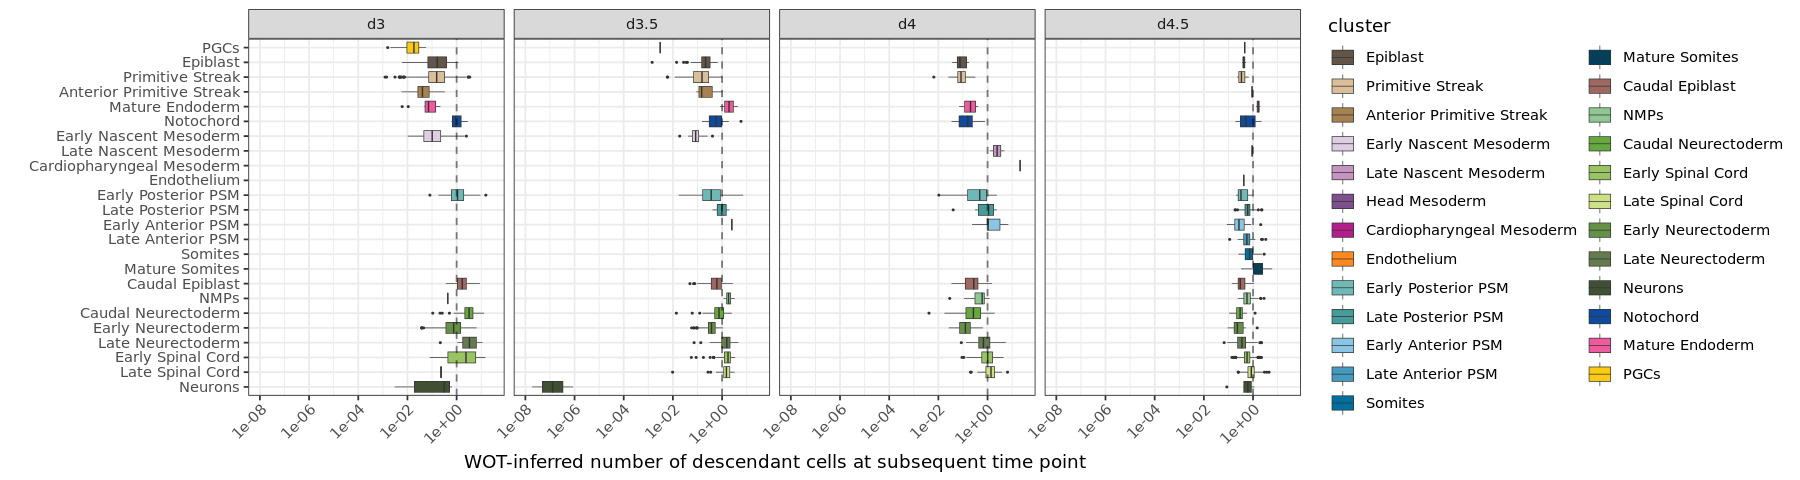

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


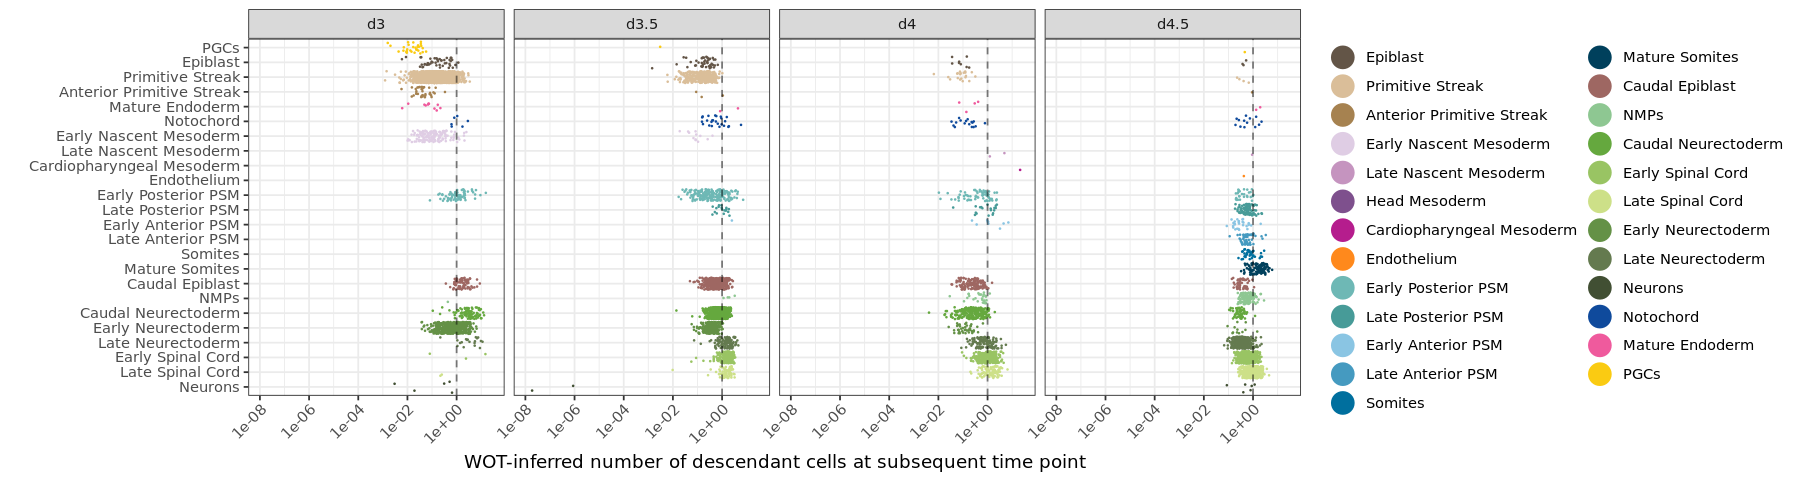

Warning message:
“Removed 1 rows containing missing values (geom_point).”


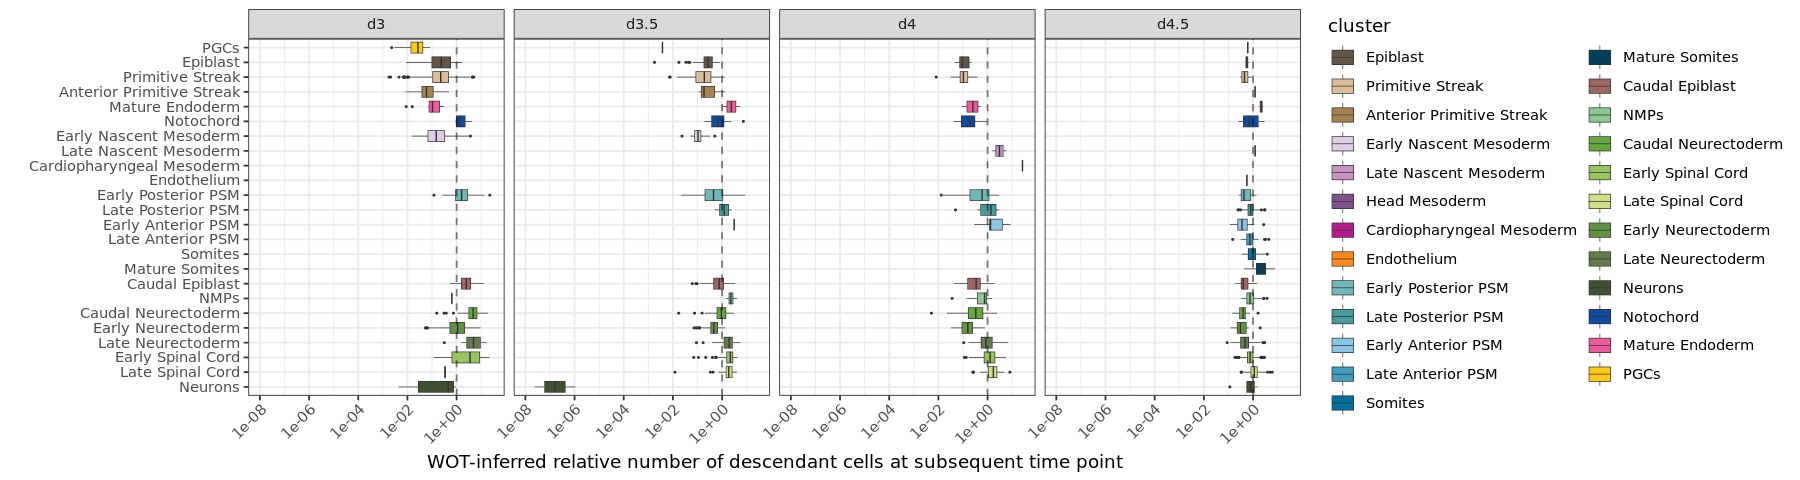

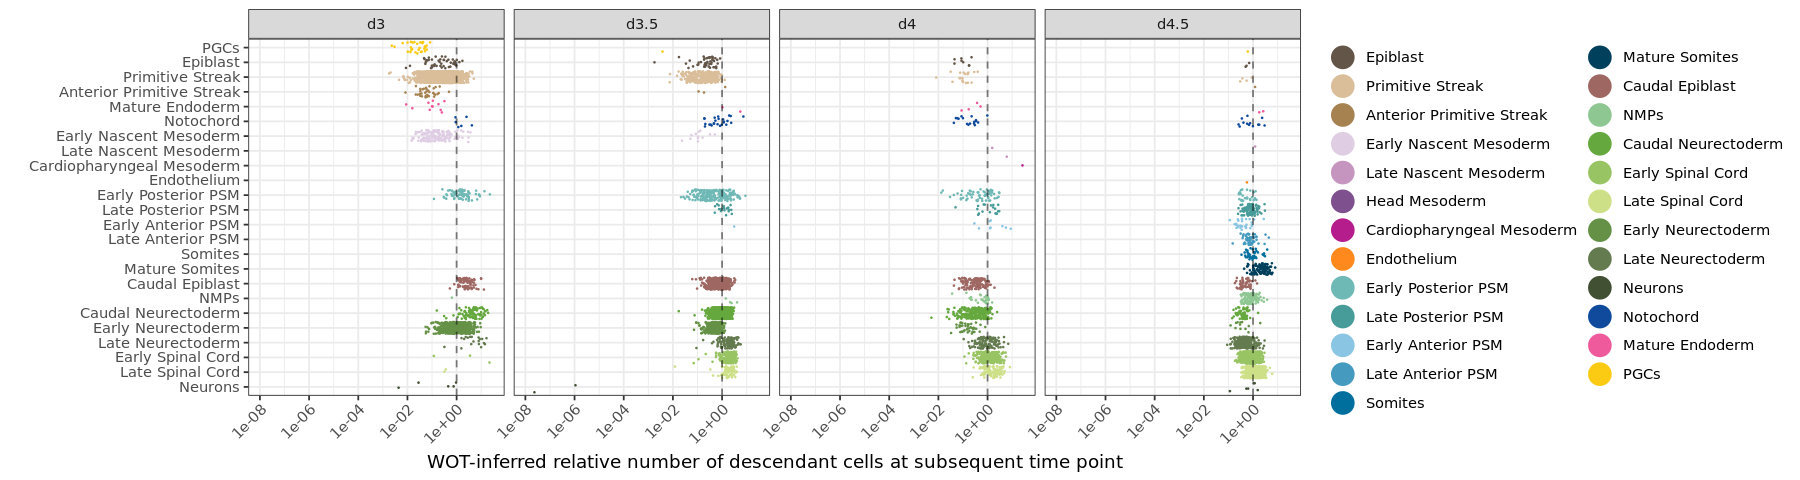

In [5]:
options(repr.plot.width=15, repr.plot.height=4)
to.plot <- wk_transmat_obs[timepoint %in% c("d3", "d3.5", "d4", "d4.5")]
to.plot$timepoint <- factor(to.plot$timepoint, levels=c("d3", "d3.5", "d4", "d4.5"))
to.plot$cluster <- factor(to.plot$cluster, levels=rev(cluster_order))
to.plot$rel_growth <- sqrt(to.plot$estimated_growth_rates)
to.plot[,cells_per_tp := .N,by=c("timepoint")]
to.plot[,sqrt_egr_per_tp := sum(rel_growth),by=c("timepoint")]
to.plot$rel_growth <- to.plot$rel_growth * to.plot$cells_per_tp / to.plot$sqrt_egr_per_tp
p <- ggplot(to.plot, aes(x=cluster, y=sqrt(estimated_growth_rates), fill=cluster)) +
  geom_boxplot(outlier.size = 0.2, size=0.2) +
  #geom_jitter(size=0.5) +
  labs(x="", y="WOT-inferred number of descendant cells at subsequent time point") +
  scale_fill_manual(values = cluster_colours) +
  geom_hline(yintercept = 1, linetype="dashed", alpha=0.5) +
  #scale_colour_manual(values = cluster_colours) +
  scale_y_continuous(trans='log2', breaks=c(10^(-8), 10^(-6), 10^(-4), 10^(-2), 1, 100), limits=c(10^(-8), 30)) +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  coord_flip() +
  facet_wrap(~timepoint, nrow = 1)
print(p)
p <- ggplot(to.plot, aes(x=cluster, y=sqrt(estimated_growth_rates), colour=cluster)) +
  #geom_boxplot(outlier.size = 0.2, size=0.2) +
  geom_jitter(size=0.1) +
  labs(x="", y="WOT-inferred number of descendant cells at subsequent time point", colour="") +
  #scale_fill_manual(values = cluster_colours) +
  geom_hline(yintercept = 1, linetype="dashed", alpha=0.5) +
  scale_colour_manual(values = cluster_colours) +
  scale_y_continuous(trans='log2', breaks=c(10^(-8), 10^(-6), 10^(-4), 10^(-2), 1, 100), limits=c(10^(-8), 30)) +
  guides(colour = guide_legend(override.aes = list(size=6))) +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  coord_flip() +
  facet_wrap(~timepoint, nrow = 1)
print(p)
ggsave(
  '/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/data_dir/processed_files_Leah/scRNAseq/final_plots/SuppFig8/B.pdf',
  plot = p,
  device = 'pdf',
  width = 15,
  height = 4,
  units = "in"
)
p <- ggplot(to.plot, aes(x=cluster, y=rel_growth, fill=cluster)) +
  geom_boxplot(outlier.size = 0.2, size=0.2) +
  #geom_jitter(size=0.5) +
  labs(x="", y="WOT-inferred relative number of descendant cells at subsequent time point") +
  scale_fill_manual(values = cluster_colours) +
  geom_hline(yintercept = 1, linetype="dashed", alpha=0.5) +
  #scale_colour_manual(values = cluster_colours) +
  scale_y_continuous(trans='log2', breaks=c(10^(-8), 10^(-6), 10^(-4), 10^(-2), 1, 100), limits=c(10^(-8), 30)) +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  coord_flip() +
  facet_wrap(~timepoint, nrow = 1)
print(p)
p <- ggplot(to.plot, aes(x=cluster, y=rel_growth, colour=cluster)) +
  #geom_boxplot(outlier.size = 0.2, size=0.2) +
  geom_jitter(size=0.1) +
  labs(x="", y="WOT-inferred relative number of descendant cells at subsequent time point", colour="") +
  #scale_fill_manual(values = cluster_colours) +
  geom_hline(yintercept = 1, linetype="dashed", alpha=0.5) +
  scale_colour_manual(values = cluster_colours) +
  scale_y_continuous(trans='log2', breaks=c(10^(-8), 10^(-6), 10^(-4), 10^(-2), 1, 100), limits=c(10^(-8), 30)) +
  guides(colour = guide_legend(override.aes = list(size=6))) +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  coord_flip() +
  facet_wrap(~timepoint, nrow = 1)
print(p)

In [6]:
wk_transmat_melt <- data.table(cell1 = wk_transmat_obs$cell[wk_transmat@i+1], cell2 = wk_transmat_obs$cell[wk_transmat@j+1], wk_transmat = wk_transmat@x)
wk_transmat_proli <- wk_transmat
rownames(wk_transmat_proli) <- wk_transmat_obs$V1
colnames(wk_transmat_proli) <- wk_transmat_obs$V1
wk_transmat_proli <- wk_transmat_proli * sqrt(wk_transmat_obs$estimated_growth_rates)
wk_transmat_proli <- wk_transmat_proli[!is.na(wk_transmat_obs$estimated_growth_rates),] %>% as.matrix
wk_transmat_proli_melt <- reshape2::melt(wk_transmat_proli, value.name="wk_transmat_proli") %>% as.data.table %>% setnames(., c("Var1", "Var2"), c("cell1", "cell2"))

rownames(wk_transmap_3_35) <- wk_transmap_3_35_obs$V1
colnames(wk_transmap_3_35) <- wk_transmap_3_35_var$V1
wk_transmap_3_35_melt <- reshape2::melt(wk_transmap_3_35, value.name="wk_transmap") %>% as.data.table %>% setnames(., c("Var1", "Var2"), c("cell1", "cell2"))
rownames(wk_transmap_35_4) <- wk_transmap_35_4_obs$V1
colnames(wk_transmap_35_4) <- wk_transmap_35_4_var$V1
wk_transmap_35_4_melt <- reshape2::melt(wk_transmap_35_4, value.name="wk_transmap") %>% as.data.table %>% setnames(., c("Var1", "Var2"), c("cell1", "cell2"))
rownames(wk_transmap_4_45) <- wk_transmap_4_45_obs$V1
colnames(wk_transmap_4_45) <- wk_transmap_4_45_var$V1
wk_transmap_4_45_melt <- reshape2::melt(wk_transmap_4_45, value.name="wk_transmap") %>% as.data.table %>% setnames(., c("Var1", "Var2"), c("cell1", "cell2"))
rownames(wk_transmap_45_5) <- wk_transmap_45_5_obs$V1
colnames(wk_transmap_45_5) <- wk_transmap_45_5_var$V1
wk_transmap_45_5_melt <- reshape2::melt(wk_transmap_45_5, value.name="wk_transmap") %>% as.data.table %>% setnames(., c("Var1", "Var2"), c("cell1", "cell2"))
wk_transmap_melt <- rbindlist(list(wk_transmap_3_35_melt, wk_transmap_35_4_melt, wk_transmap_4_45_melt, wk_transmap_45_5_melt))

vk_transmat_melt <- data.table(cell1 = vk_transmat_obs$cell[vk_transmat@i+1], cell2 = vk_transmat_obs$cell[vk_transmat@j+1], vk_transmat = vk_transmat@x)
vk_transmat_proli <- vk_transmat
rownames(vk_transmat_proli) <- vk_transmat_obs$V1
colnames(vk_transmat_proli) <- vk_transmat_obs$V1
vk_transmat_proli <- vk_transmat_proli * sqrt(wk_transmat_obs$estimated_growth_rates[match(vk_transmat_obs$V1, wk_transmat_obs$cell)])
vk_transmat_proli <- vk_transmat_proli[!is.na(wk_transmat_obs$estimated_growth_rates[match(vk_transmat_obs$V1, wk_transmat_obs$cell)]),] %>% as.matrix
vk_transmat_proli_melt <- reshape2::melt(vk_transmat_proli, value.name="vk_transmat_proli") %>% as.data.table %>% setnames(., c("Var1", "Var2"), c("cell1", "cell2"))

ck_transmat_melt <- data.table(cell1 = ck_transmat_obs$cell[ck_transmat@i+1], cell2 = ck_transmat_obs$cell[ck_transmat@j+1], ck_transmat = ck_transmat@x)
ck_transmat_proli <- ck_transmat
rownames(ck_transmat_proli) <- ck_transmat_obs$V1
colnames(ck_transmat_proli) <- ck_transmat_obs$V1
ck_transmat_proli <- ck_transmat_proli * sqrt(wk_transmat_obs$estimated_growth_rates[match(ck_transmat_obs$V1, wk_transmat_obs$cell)])
ck_transmat_proli <- ck_transmat_proli[!is.na(wk_transmat_obs$estimated_growth_rates[match(ck_transmat_obs$V1, wk_transmat_obs$cell)]),] %>% as.matrix
ck_transmat_proli_melt <- reshape2::melt(ck_transmat_proli, value.name="ck_transmat_proli") %>% as.data.table %>% setnames(., c("Var1", "Var2"), c("cell1", "cell2"))

In [7]:
vk_transmat_3_35 <- vk_transmat[vk_transmat_obs$cell %in% rownames(wk_transmap_3_35), vk_transmat_obs$cell %in% colnames(wk_transmap_3_35)]
rownames(vk_transmat_3_35) <- vk_transmat_obs$cell[vk_transmat_obs$cell %in% rownames(wk_transmap_3_35)]
colnames(vk_transmat_3_35) <- vk_transmat_obs$cell[vk_transmat_obs$cell %in% colnames(wk_transmap_3_35)]
vk_transmat_3_35_proli <- (vk_transmat_3_35 * (sqrt(wk_transmat_obs$estimated_growth_rates[match(rownames(vk_transmat_3_35), wk_transmat_obs$cell)])/rowSums(vk_transmat_3_35))) %>% as.matrix
vk_transmat_3_35_proli_melt <- reshape2::melt(vk_transmat_3_35_proli, value.name="vk_transmat_proli") %>% as.data.table %>% setnames(., c("Var1", "Var2"), c("cell1", "cell2"))

vk_transmat_35_4 <- vk_transmat[vk_transmat_obs$cell %in% rownames(wk_transmap_35_4), vk_transmat_obs$cell %in% colnames(wk_transmap_35_4)]
rownames(vk_transmat_35_4) <- vk_transmat_obs$cell[vk_transmat_obs$cell %in% rownames(wk_transmap_35_4)]
colnames(vk_transmat_35_4) <- vk_transmat_obs$cell[vk_transmat_obs$cell %in% colnames(wk_transmap_35_4)]
vk_transmat_35_4_proli <- (vk_transmat_35_4 * (sqrt(wk_transmat_obs$estimated_growth_rates[match(rownames(vk_transmat_35_4), wk_transmat_obs$cell)])/rowSums(vk_transmat_35_4))) %>% as.matrix
vk_transmat_35_4_proli_melt <- reshape2::melt(vk_transmat_35_4_proli, value.name="vk_transmat_proli") %>% as.data.table %>% setnames(., c("Var1", "Var2"), c("cell1", "cell2"))

vk_transmat_4_45 <- vk_transmat[vk_transmat_obs$cell %in% rownames(wk_transmap_4_45), vk_transmat_obs$cell %in% colnames(wk_transmap_4_45)]
rownames(vk_transmat_4_45) <- vk_transmat_obs$cell[vk_transmat_obs$cell %in% rownames(wk_transmap_4_45)]
colnames(vk_transmat_4_45) <- vk_transmat_obs$cell[vk_transmat_obs$cell %in% colnames(wk_transmap_4_45)]
vk_transmat_4_45_proli <- (vk_transmat_4_45 * (sqrt(wk_transmat_obs$estimated_growth_rates[match(rownames(vk_transmat_4_45), wk_transmat_obs$cell)])/rowSums(vk_transmat_4_45))) %>% as.matrix
vk_transmat_4_45_proli_melt <- reshape2::melt(vk_transmat_4_45_proli, value.name="vk_transmat_proli") %>% as.data.table %>% setnames(., c("Var1", "Var2"), c("cell1", "cell2"))

vk_transmat_45_5 <- vk_transmat[vk_transmat_obs$cell %in% rownames(wk_transmap_45_5), vk_transmat_obs$cell %in% colnames(wk_transmap_45_5)]
rownames(vk_transmat_45_5) <- vk_transmat_obs$cell[vk_transmat_obs$cell %in% rownames(wk_transmap_45_5)]
colnames(vk_transmat_45_5) <- vk_transmat_obs$cell[vk_transmat_obs$cell %in% colnames(wk_transmap_45_5)]
vk_transmat_45_5_proli <- (vk_transmat_45_5 * (sqrt(wk_transmat_obs$estimated_growth_rates[match(rownames(vk_transmat_45_5), wk_transmat_obs$cell)])/rowSums(vk_transmat_45_5))) %>% as.matrix
vk_transmat_45_5_proli_melt <- reshape2::melt(vk_transmat_45_5_proli, value.name="vk_transmat_proli") %>% as.data.table %>% setnames(., c("Var1", "Var2"), c("cell1", "cell2"))

vk_transmat_proli_melt <- rbindlist(list(vk_transmat_3_35_proli_melt, vk_transmat_35_4_proli_melt, vk_transmat_4_45_proli_melt, vk_transmat_45_5_proli_melt))
vk_transmat_proli_melt[is.na(vk_transmat_proli), vk_transmat_proli := 0]

In [8]:
to.plot <- Reduce(function(x,y) merge(x, y, by=c("cell1", "cell2"), all=TRUE),
                  list(wk_transmat_melt, wk_transmap_melt, vk_transmat_melt, ck_transmat_melt, wk_transmat_proli_melt, vk_transmat_proli_melt, ck_transmat_proli_melt)
                 )

to.plot[is.na(to.plot)] <- 0
to.plot$celltype1 <- wk_transmat_obs$cluster[match(to.plot$cell1, wk_transmat_obs$cell)]
to.plot$celltype2 <- wk_transmat_obs$cluster[match(to.plot$cell2, wk_transmat_obs$cell)]
to.plot$tp1 <- wk_transmat_obs$timepoint[match(to.plot$cell1, wk_transmat_obs$cell)]
to.plot$tp2 <- wk_transmat_obs$timepoint[match(to.plot$cell2, wk_transmat_obs$cell)]

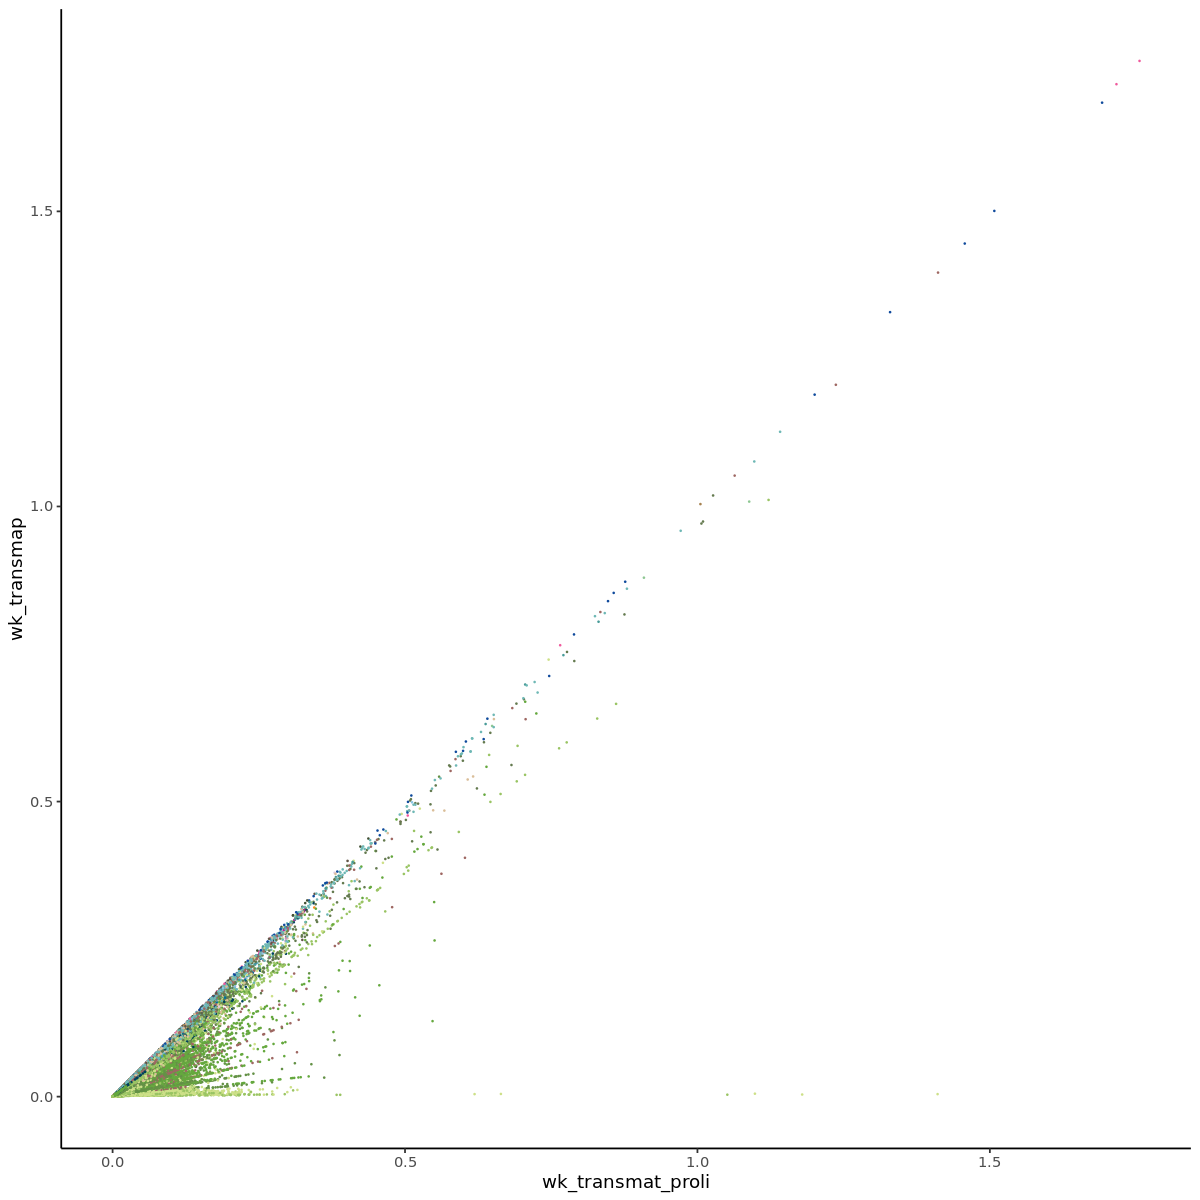

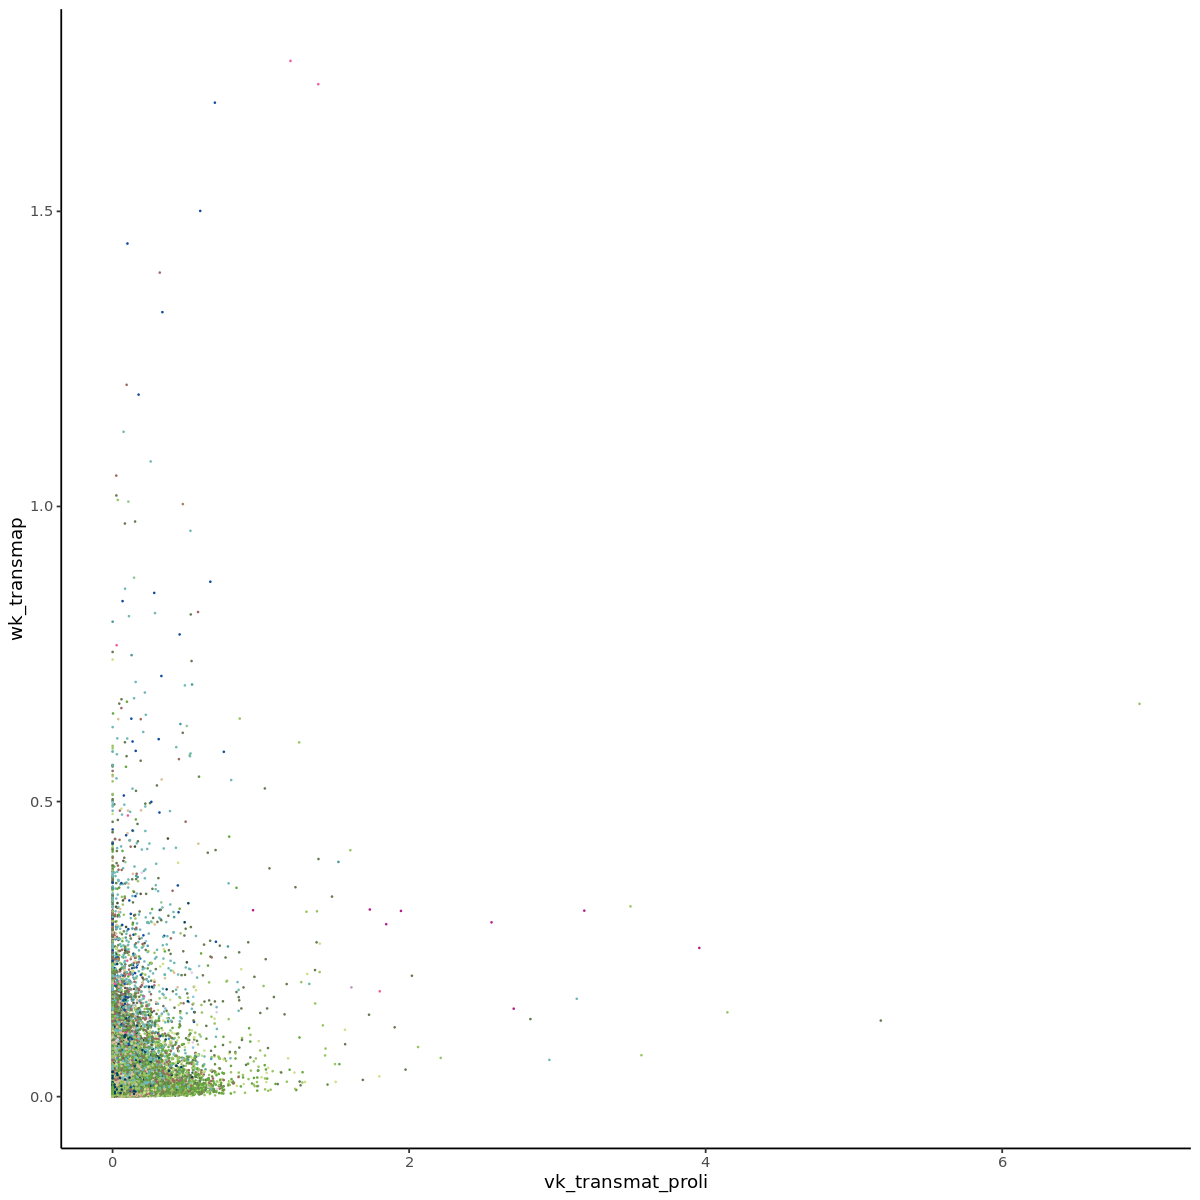

In [9]:
options(repr.plot.width=10, repr.plot.height=10)
p <- ggplot(to.plot[wk_transmat != 0], aes(x=wk_transmat_proli, y=wk_transmap, colour=celltype1)) +
    geom_point(size=0.1) +
    scale_colour_manual(values = cluster_colours, name = "Celltype 1") +
    theme_classic() +
    theme(legend.position = 'None')
print(p)
p <- ggplot(to.plot[wk_transmat != 0], aes(x=vk_transmat_proli, y=wk_transmap, colour=celltype1)) +
    geom_point(size=0.1) +
    scale_colour_manual(values = cluster_colours, name = "Celltype 1") +
    theme_classic() +
    theme(legend.position = 'None')
print(p)

In [10]:
#transition_mat_full <- to.plot[, lapply(.SD, sum, na.rm=TRUE), by=.(celltype1,celltype2, tp1, tp2), .SDcols=c("wk_transmat", "wk_transmap", "vk_transmat", "ck_transmat", "wk_transmat_proli", "vk_transmat_proli", "ck_transmat_proli") ]
transition_mat_full <- to.plot[, lapply(.SD, sum, na.rm=TRUE), by=.(celltype1,celltype2, tp1, tp2), .SDcols=c("wk_transmat", "wk_transmap", "wk_transmat_proli", "vk_transmat_proli") ]
transition_mat_full <- setnames(transition_mat_full, c("tp1", "tp2"), c("timepoint1", "timepoint2"))
transition_mat_full <- transition_mat_full[(wk_transmat>0) | (wk_transmap>0) | (wk_transmat_proli>0) | (vk_transmat_proli>0)]
transition_mat_full <- transition_mat_full[timepoint1 != 'd5']
transition_mat_full[celltype1 == "Anterior PSM 1", celltype1 := "Early Anterior PSM"]
transition_mat_full[celltype1 == "Anterior PSM 2", celltype1 := "Late Anterior PSM"]
transition_mat_full[celltype1 == "Posterior PSM 1", celltype1 := "Early Posterior PSM"]
transition_mat_full[celltype1 == "Posterior PSM 2", celltype1 := "Late Posterior PSM"]
transition_mat_full[celltype2 == "Anterior PSM 1", celltype2 := "Early Anterior PSM"]
transition_mat_full[celltype2 == "Anterior PSM 2", celltype2 := "Late Anterior PSM"]
transition_mat_full[celltype2 == "Posterior PSM 1", celltype2 := "Early Posterior PSM"]
transition_mat_full[celltype2 == "Posterior PSM 2", celltype2 := "Late Posterior PSM"]


In [11]:
meta <- fread("/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/data_dir/processed_files_Leah/scRNAseq/cellrank_meta.csv")
meta$V1 <- NULL
meta[cluster == "Anterior PSM 1", cluster := "Early Anterior PSM"]
meta[cluster == "Anterior PSM 2", cluster := "Late Anterior PSM"]
meta[cluster == "Posterior PSM 1", cluster := "Early Posterior PSM"]
meta[cluster == "Posterior PSM 2", cluster := "Late Posterior PSM"]
meta[MULTI_class %in% as.vector(unlist(neural)), gastr_type := "neural"]
meta[MULTI_class %in% as.vector(unlist(mesodermal)), gastr_type := "mesodermal"]
meta[MULTI_class %in% as.vector(unlist(intermediate)), gastr_type := "intermediate"]

Warning message:
“`spread_()` was deprecated in tidyr 1.2.0.
Please use `spread()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”
Warning message:
“The `.dots` argument of `group_by()` is deprecated as of dplyr 1.0.0.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


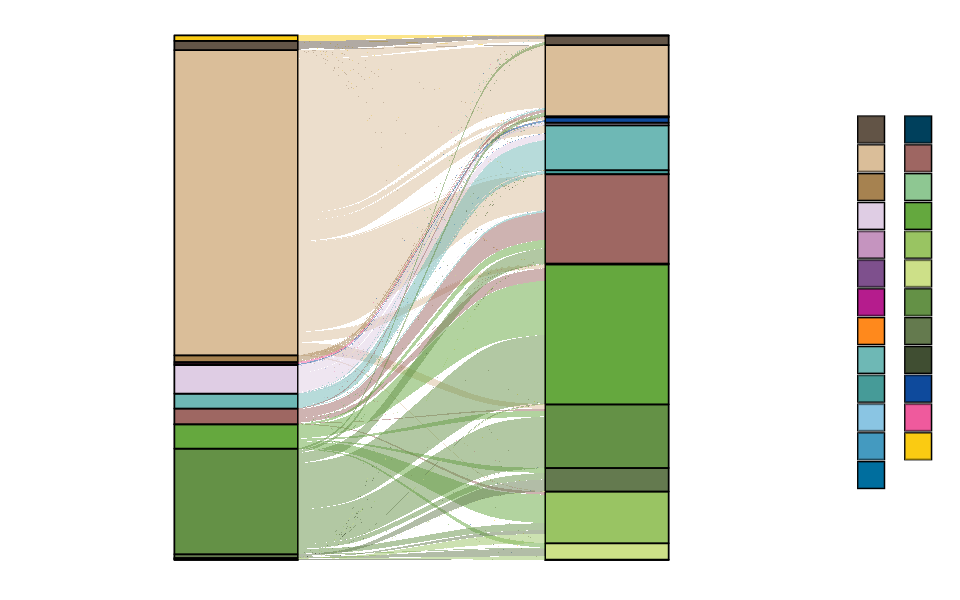

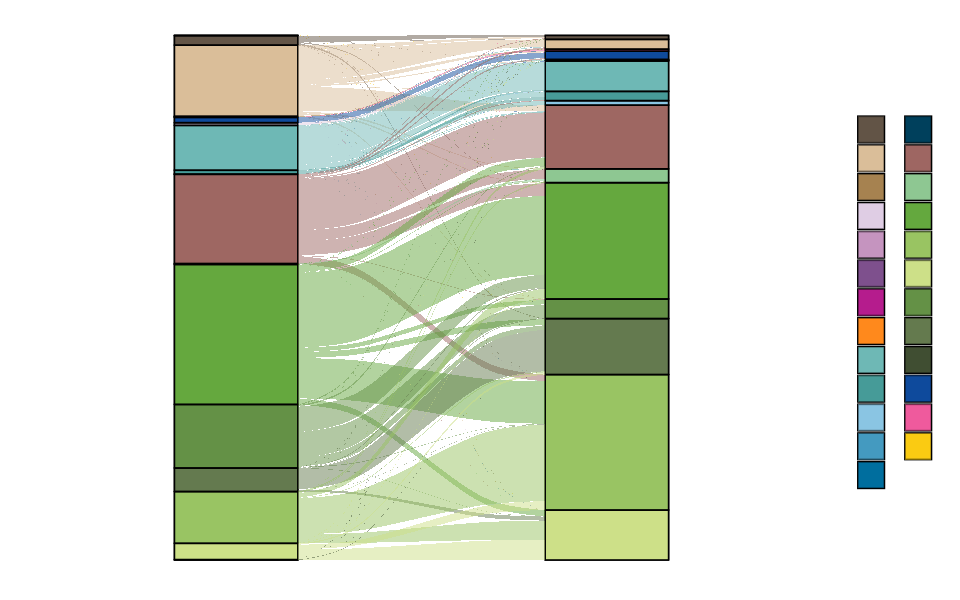

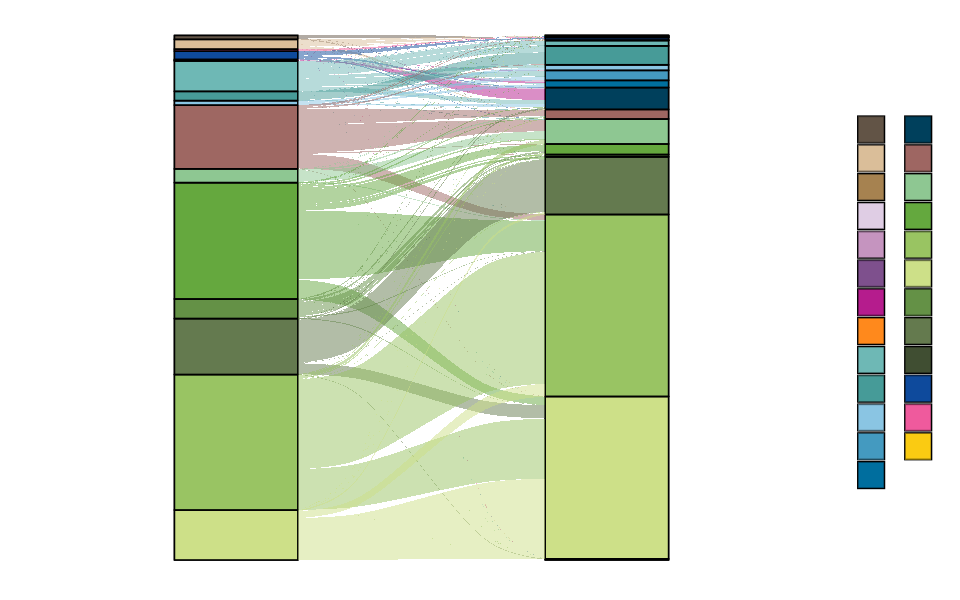

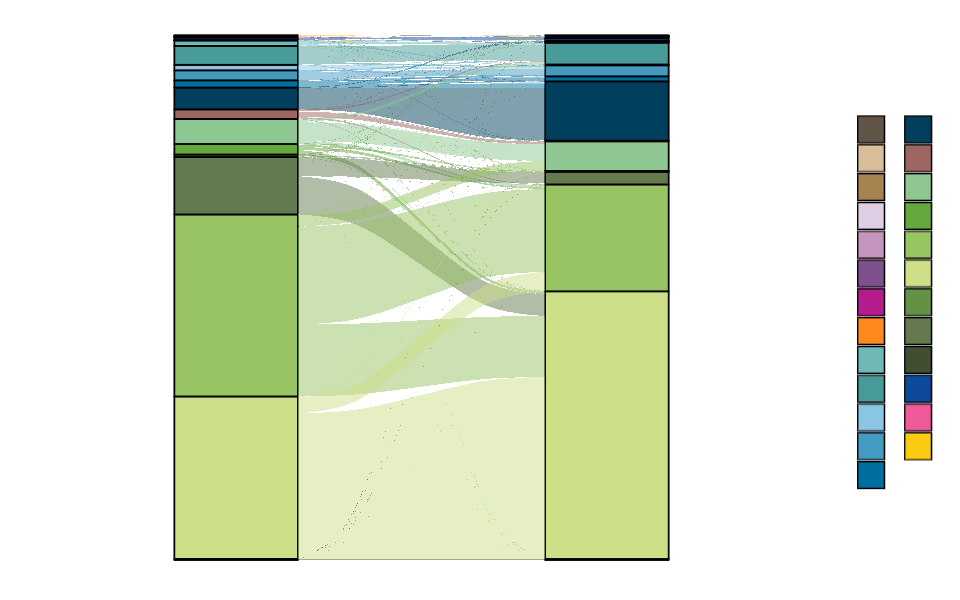

In [12]:
tp_combo <- c('d3_d3.5', 'd3.5_d4', 'd4_d4.5', 'd4.5_d5')

transition_list_full <- list()
for (c in tp_combo) {
    
    tp1 <- strsplit(c, '_')[[1]][1]
    tp2 <- strsplit(c, '_')[[1]][2]
    
    tp1_df <- as.data.table(transition_mat_full[(timepoint1 == tp1) & (wk_transmap>0), c("celltype1", "celltype2", "timepoint1", "timepoint2", "wk_transmap")])
    tp1_df$combo <- paste0(c, '_', tp1_df$celltype1, '_', tp1_df$celltype2)
    tp1_df$celltype2 <- NULL
    tp1_df$timepoint <- tp1
    tp1_df <- setnames(tp1_df, c("celltype1"), c("celltype"))
    #print(aggregate(. ~ timepoint, tp1_df[, c("timepoint", "value")], sum))
    tp2_df <- as.data.table(transition_mat_full[(timepoint1 == tp1) & (wk_transmap>0), c("celltype1", "celltype2", "timepoint1", "timepoint2", "wk_transmap")])
    tp2_df$combo <- paste0(c, '_', tp2_df$celltype1, '_', tp2_df$celltype2)
    tp2_df$celltype1 <- NULL
    tp2_df$timepoint <- tp2
    tp2_df <- setnames(tp2_df, c("celltype2"), c("celltype"))
    #print(aggregate(. ~ timepoint, tp2_df[, c("timepoint", "value")], sum))

    tp1_target <- meta[(timepoint==tp1) & (gastr_type == "neural"),.N,by=c("cluster")]
    tp2_target <- meta[(timepoint==tp2) & (gastr_type == "neural"),.N,by=c("cluster")]
    tp1_target$N <- tp1_target$N * (20000 / nrow(meta[(timepoint==tp1) & (gastr_type == "neural")]))
    tp2_target$N <- tp2_target$N * (20000 / nrow(meta[(timepoint==tp2) & (gastr_type == "neural")]))

    for (ct in tp1_target$cluster) {
        ct_sum <- sum(tp1_df[celltype == ct]$wk_transmap)
        ct_target <- tp1_target[cluster == ct]$N
        tp1_df[celltype == ct, wk_transmap := wk_transmap*(ct_target/ct_sum)]
    }
    #print(aggregate(. ~ timepoint, tp1_df[, c("timepoint", "value")], sum))

    for (ct in tp2_target$cluster) {
        ct_sum <- sum(tp2_df[celltype == ct]$wk_transmap)
        ct_target <- tp2_target[cluster == ct]$N
        tp2_df[celltype == ct, wk_transmap := wk_transmap*(ct_target/ct_sum)]
    }
    #print(aggregate(. ~ timepoint, tp2_df[, c("timepoint", "value")], sum))

    transition_list_full[[c]] <- rbind(tp1_df, tp2_df)
    #print(aggregate(. ~ timepoint, gamma_df_melt_list[[c]][, c("timepoint", "value")], sum))
    transition_list_full[[c]]$celltype = factor(transition_list_full[[c]]$celltype, levels=cluster_order)
    #print(aggregate(. ~ timepoint, gamma_df_melt_list[[c]][, c("timepoint", "value")], sum))
    
}

transition_full <- rbindlist(transition_list_full)

options(repr.plot.width=8, repr.plot.height=5)

for (c in tp_combo) {
    p <- ggplot(transition_list_full[[c]],
           aes(x = timepoint, y = wk_transmap, stratum = celltype, alluvium = combo)) +
      geom_stratum(aes(fill = celltype)) +
      #geom_stratum(width = 1/10, fill = paste0(stratCols)) +
      geom_flow(aes(fill=celltype)) +
      scale_fill_manual(values = cluster_colours, name = "Celltype") +
      theme_classic() +
      theme(line = element_blank(),
            text = element_blank(),
            title = element_blank())
    print(p)
    ggsave(
      paste0('/nfs/research/marioni/Leah/gastrulation_epigenetics/gastruloid_characterisation/data_dir/processed_files_Leah/scRNAseq/final_plots/Fig2/G_', c, '.pdf'),
      plot = p,
      device = 'pdf',
      width = 8,
      height = 5,
      units = "in"
    )
}